# Lecture 07: Curve fitting
2019-06-04

Course material is available at http://unihb.eu/pdap2019

### Transcript

1. 



## Plan for the rest of the semester

1. netCDF files, xarray
2. more plotting (animations, maps)
3. more on handling dates
4. working without the notebook (writing modules and scripts)
5. ???

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Linear regression

### Generate synthetic measurement data

#### Seeding the RNG

Leads to reproduciple yet random numbers:


In [2]:
np.random.randn(3)

array([-0.184948  ,  0.87785944,  0.76349051])

In [3]:
np.random.randn(3)

array([ 0.33931706, -0.31233061,  0.97186664])

In [4]:
np.random.randn(3)

array([ 0.1166902 ,  0.47396414, -2.73259413])

But:

In [5]:
np.random.seed(321)
np.random.randn(3)

array([0.17251947, 1.63548253, 0.0373364 ])

In [6]:
np.random.seed(321)
np.random.randn(3)

array([0.17251947, 1.63548253, 0.0373364 ])

In [7]:
np.random.seed(321)
np.random.randn(3)

array([0.17251947, 1.63548253, 0.0373364 ])

#### Generating the noisy data

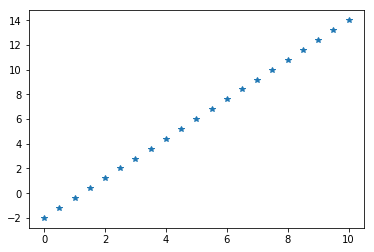

In [8]:
x  = np.linspace(0., 10., 21)

slope_true, intercept_true = 1.6, -2.0
y_true = x * slope_true + intercept_true

plt.plot(x, y_true, '*');

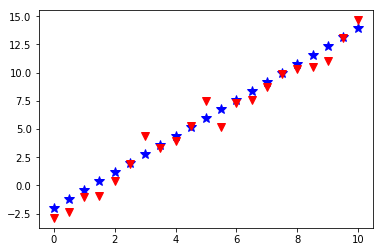

In [9]:
noise = np.random.randn(21)
y_noisy = y_true + noise

plt.plot(x, y_true, 'b*', ms=10)
plt.plot(x, y_noisy, 'rv', ms=8)

### Method 1: numpy.polyfit

In [10]:
slope_fitted, intercept_fitted = np.polyfit(x, y_noisy, 1)
slope_fitted, intercept_fitted

(1.6283648673895355, -2.5441487263489484)

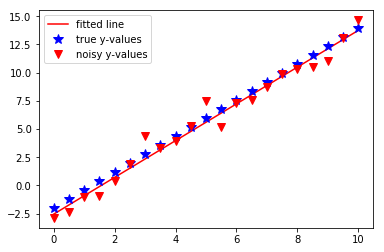

In [11]:
y_fitted = x * slope_fitted + intercept_fitted
plt.plot(x, y_fitted, 'r-', label='fitted line')
plt.plot(x, y_true, 'b*', ms=10, label='true y-values')
plt.plot(x, y_noisy, 'rv', ms=8, label='noisy y-values')
plt.legend(loc=0);

### Method 2: scipy.stats.linregress

In [12]:
from scipy.stats import linregress

In [13]:
sl_sp, in_sp, r_sp, p_sp, se_sp = linregress(x, y_noisy)
sl_sp, in_sp, r_sp, p_sp, se_sp

(1.6283648673895355,
 -2.5441487263489506,
 0.9866539728322252,
 1.9281029373168111e-16,
 0.06165200027127137)

### Method 3: statsmodels

Link to statsmodels documentation: http://www.statsmodels.org/stable/index.html

In [14]:
import pandas as pd
from statsmodels.formula.api import ols

In [15]:
data = pd.DataFrame({'x': x, 'y_noisy': y_noisy})
data.head(2)

x   y_noisy
0  0.0 -2.884150
1  0.5 -2.343192

In [16]:
lm = ols(formula='y_noisy ~ x', data=data)
lm_result = lm.fit()
lm_result.params

Intercept   -2.544149
x            1.628365
dtype: float64

In [17]:
lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_noisy   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     697.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.93e-16
Time:                        13:21:24   Log-Likelihood:                -25.467
No. Observations:                  21   AIC:                             54.93
Df Residuals:                      19   BIC:                             57.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5441      0.360     -7.060      0.000      -3.298      -1.790
x              1.6284      0.062     26.412      0.000       1.499       1.757
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.113
Skew:                           0.997   Prob(JB):                        0.128
Kurtosis:                       3.852   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Contents of the statsmodels result object:

The result of $x \times fit_{slope} + fit_{intercept}$

0     -2.544149
1     -1.729966
2     -0.915784
3     -0.101601
4      0.712581
5      1.526763
6      2.340946
7      3.155128
8      3.969311
9      4.783493
10     5.597676
11     6.411858
12     7.226040
13     8.040223
14     8.854405
15     9.668588
16    10.482770
17    11.296953
18    12.111135
19    12.925318
20    13.739500
dtype: float64


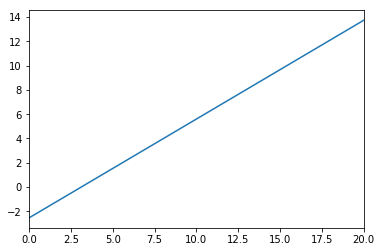

In [18]:
print(lm_result.fittedvalues)
lm_result.fittedvalues.plot();

The fit results:

In [19]:
lm_result.params

Intercept   -2.544149
x            1.628365
dtype: float64

Confidence intervals for the parameters (choose interval size using `alpha` kwarg):

In [20]:
lm_result.conf_int()

0         1
Intercept -3.298412 -1.789886
x          1.499326  1.757404

You can directly *predict* new $y$ values from the result object (instead of doing x_new * fit_slope + fit_intercept):

In [21]:
lm_result.predict(pd.DataFrame({'x': np.linspace(.5, 19.5, 20)}))

0     -1.729966
1     -0.101601
2      1.526763
3      3.155128
4      4.783493
5      6.411858
6      8.040223
7      9.668588
8     11.296953
9     12.925318
10    14.553682
11    16.182047
12    17.810412
13    19.438777
14    21.067142
15    22.695507
16    24.323872
17    25.952236
18    27.580601
19    29.208966
dtype: float64

Standard errors:

In [22]:
lm_result.bse

Intercept    0.360370
x            0.061652
dtype: float64

For a full list of options, see http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

### Outliers and missing data

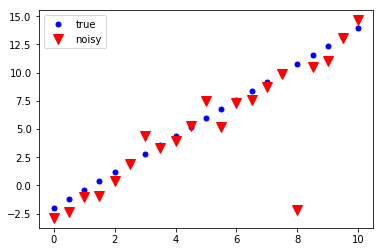

In [23]:
y_o = y_noisy.copy()
y_o[16] = -2.2

plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(x, y_o, 'rv', ms=10, label=('noisy'))
plt.legend(loc=0);

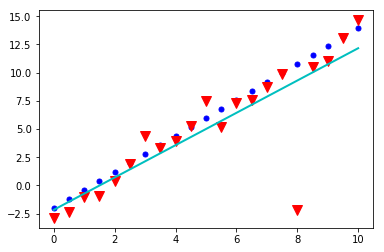

In [24]:
fit = linregress(x, y_o)
plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(x, y_o, 'rv', ms=10, label=('noisy'))
plt.plot(x, fit.slope * x + fit.intercept, 'c-', lw=2, label=('fitted'));

In [25]:
y_cleaned = y_o.copy()
y_cleaned[16] = np.nan
y_cleaned

array([-2.88414969, -2.34319226, -1.02136604, -0.94864958,  0.38026897,
        1.8657461 ,  4.39960004,  3.31639637,  3.89366018,  5.26890842,
        7.4522595 ,  5.16090439,  7.28734056,  7.52873357,  8.7433176 ,
        9.87753328,         nan, 10.50771626, 11.03782032, 13.03401303,
       14.64538909])

In [26]:
linregress(x, y_cleaned)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [27]:
data_cleaned = data.copy()
data_cleaned.loc[16, 'y_noisy'] = np.nan

In [28]:
data_cleaned = data_cleaned.dropna()

In [29]:
sl_cl, int_cl, _, _, _ = linregress(data_cleaned.x, data_cleaned.y_noisy)

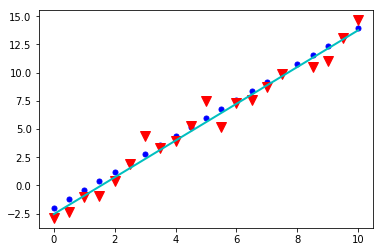

In [30]:
plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(data_cleaned.x, data_cleaned.y_noisy, 'rv', ms=10, label=('noisy'))
plt.plot(x, sl_cl * x + int_cl, 'c-', lw=2, label=('fitted'));

In [31]:
import numpy.ma as ma

In [32]:
y_masked = ma.masked_invalid(y_cleaned)
y_masked

masked_array(data=[-2.8841496854544175, -2.3431922557203286,
                   -1.0213660399158155, -0.9486495825550534,
                   0.3802689652187754, 1.8657461004234035,
                   4.399600043043521, 3.3163963657878477,
                   3.8936601826809434, 5.268908424206256,
                   7.452259504952894, 5.160904392840054,
                   7.287340558740653, 7.528733572525544,
                   8.743317603646776, 9.87753327602694, --,
                   10.5077162636498, 11.037820322802188,
                   13.034013030945204, 14.64538908570162],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                    True, False, False, False, False],
       fill_value=1e+20)

In [33]:
import scipy.stats.mstats

In [34]:
scipy.stats.mstats.linregress(x, y_masked)

LinregressResult(slope=1.6306679126623231, intercept=-2.5486268699349255, rvalue=0.9860376308726231, pvalue=1.8208890204735308e-15, stderr=0.06490962164311105)

### Weighted regression

There are several ways to include individual weights (e.g., from individual error estimates) in a regression:

- You can use `np.polyfit` with the `w` kwarg to specify weights.
- `scipy.stats.linregress` does not support weights.
- in statsmodels, you can use Weighted Least Squares (http://www.statsmodels.org/stable/examples/notebooks/generated/wls.html)
- in `curve_fit` (see below) you can use the `sigma` and `absolute_sigma` kwargs (see https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/ for an example)

## Curve fitting

### Linear regression using `curve_fit`

In [35]:
def line(x, slope, intercept):
    return x * slope + intercept

In [36]:
from scipy.optimize import curve_fit

In [37]:
curve_fit(line, x, y_noisy)

(array([ 1.62836487, -2.54414873]), array([[ 0.00380097, -0.01900485],
        [-0.01900485,  0.12986645]]))

### Fitting a line with fixed intercept

In [38]:
def fixed_line(x, slope):
    return x * slope - 2.0
res = curve_fit(fixed_line, x, y_noisy)
res

(array([1.54873335]), array([[0.00108504]]))

### Fitting a Gaussian
$$ f(x) = A \cdot \frac{1}{\sigma \cdot \sqrt{2 \pi}} \cdot \exp -\frac{(x - \mu)^2}{2 * \sigma ^2} $$

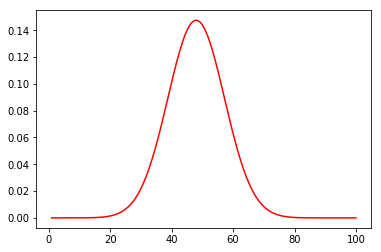

In [39]:
MU = 48.
SIGMA = 9.2
A = 3.4
X = np.linspace(1., 100., 201)
Y = A / (SIGMA * np.sqrt(2 * np.pi)) * np.exp(-(X - MU)**2 / (2.0 * SIGMA**2))
plt.plot(X, Y, 'r-');

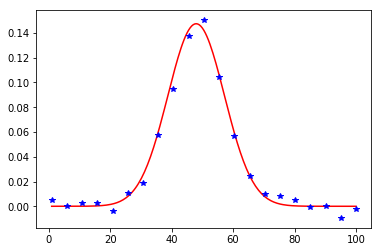

In [40]:
X_SAMPLE = X[::10]
Y_SAMPLE = Y[::10] + np.random.normal(scale=0.006, size=X_SAMPLE.size)
plt.plot(X, Y, 'r-')
plt.plot(X_SAMPLE, Y_SAMPLE, 'b*');

In [41]:
def gaussian(x, mu, sigma, a):
    return a / np.sqrt(2*np.pi) / sigma * np.exp(-(x-mu)**2 / 2 / sigma**2)

Without further information, the optimization algorithm will most likely fail:

In [42]:
curve_fit(gaussian, X_SAMPLE, Y_SAMPLE)

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([-12.79215655,   1.49387038,   0.50612956]), array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

We need to include all the *knowledge* we have.

First step: initial guesses for all three parameters.  `1.0` is the default, which, looking at our data, doesn't make a lot of sense.  So we start at `mu=45`:

In [43]:
curve_fit(gaussian, X_SAMPLE, Y_SAMPLE, p0=[45., 1., 1.])

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 4015.62612745,   489.51300389, -1188.98597019]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

Note how the algorithm still doesn't produce any proper results.  (During the lecture, these results looked a lot better, but sigma was negative, which cannot be.  The reason why it's different now is that the noise is different, as I didn't seed the RNG before creating the noise for this example)

Another piece of knowledge is the range of allowed values for the parameters.  For a Gaussian, we know that `sigma>0`, so we give `(0.0, np.inf)` as valid range for `sigmma`:

In [44]:
params, cov = curve_fit(gaussian, X_SAMPLE, Y_SAMPLE, p0=[45., 1., 1.], 
          bounds=((-np.inf, 0., -np.inf), (np.inf, np.inf, np.inf)))
mu_fitted, sigma_fitted, a_fitted = params
mu_fitted, sigma_fitted, a_fitted

(48.42167601431037, 8.877217365355747, 3.277942586621616)

This now looks pretty good:

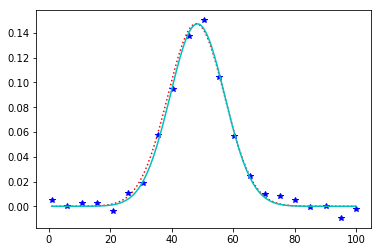

In [45]:
plt.plot(X, Y, 'r:')
plt.plot(X_SAMPLE, Y_SAMPLE, 'b*')
#plt.plot(X_SAMPLE, Y[::10] + np.random.normal(scale=0.06, size=X_SAMPLE.size), 'kv')
#plt.plot(X_SAMPLE, Y[::10] + np.random.normal(scale=0.6, size=X_SAMPLE.size), 'gv')
plt.plot(X, gaussian(X, mu_fitted, sigma_fitted, a_fitted), 'c-');

**CAUTION:** Only use *knowledge* here, no *assumptions*!

**NOTE:** This only works so well because the noise level is so low.  With more noise, the situation is of course different:

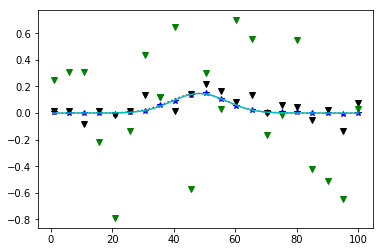

In [46]:
plt.plot(X, Y, 'r:')
plt.plot(X_SAMPLE, Y_SAMPLE, 'b*')
plt.plot(X_SAMPLE, Y[::10] + np.random.normal(scale=0.06, size=X_SAMPLE.size), 'kv')
plt.plot(X_SAMPLE, Y[::10] + np.random.normal(scale=0.6, size=X_SAMPLE.size), 'gv')
plt.plot(X, gaussian(X, mu_fitted, sigma_fitted, a_fitted), 'c-');

#### Fitting with two dependent variables

For any linear model, it's easiest to use statsmodels.

For nonlinear models, one can use `curve_fit` with several predictors, see the `xdata` kwarg:

In [47]:
def f(x, tfactor, hfactor):
    temperature, humidity = x
    return temperature * tfactor + humidity * hfactor

N = 200
temperatures = np.random.random_sample(N) * 60 - 20  # random temperatures between -20 and 40, see random_sample docstring
humidities = np.random.random_sample(N) * 100  # random humidities between 0 and 100
X2 = np.asarray([temperatures, humidities])
Y = X2[0] * 2 + X2[1] * 0.8  # our true tfactor, hfactor is 2.0, 0.8
Y_noisy = Y + np.random.normal(scale=0.5, size=N)

curve_fit(f, X2, Y_noisy)

(array([2.00107853, 0.80035908]), array([[ 3.76436156e-06, -6.15952533e-07],
        [-6.15952533e-07,  5.09368645e-07]]))

As we can see, with this low noise level, the parameters get almost perfectly reproduced.